In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from io import BytesIO 
from zipfile import ZipFile



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
a = ZipFile("names.zip").extractall('.')
a

In [13]:
name.groupby('sex').birth.sum()

sex
F     90994
M    110490
Name: birth, dtype: int64

In [6]:
years = []

for year in range(1880,2021): 
    years.append(pd.read_csv(f'yob{year}.txt',names=['Name','Sex','Babies']))
    years[-1]['Year'] = year

In [7]:
b= pd.concat(years)
b

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31448,Zykell,M,5,2020
31449,Zylus,M,5,2020
31450,Zymari,M,5,2020
31451,Zyn,M,5,2020


In [10]:
total_birth = b.pivot_table('Babies',index= 'Year',columns = 'Sex', aggfunc=sum)

In [11]:
total_birth.head()

Sex,F,M
Year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442


<AxesSubplot:title={'center':'Total Birth by sex and year'}, xlabel='Year'>

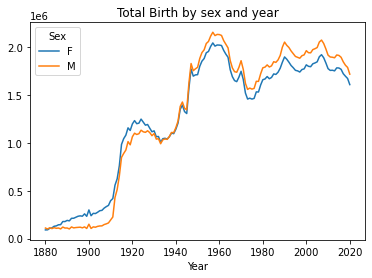

In [12]:
total_birth.plot(title = 'Total Birth by sex and year')

In [17]:
def add_pname(popular_name): 
    popular_name['popular name']=((popular_name.Babies/popular_name.Babies.sum())*100)
    return popular_name

name=b.groupby(['Year','Sex']).apply(add_pname)
name

,Name,Sex,Babies,Year,popular name
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
31448,Zykell,M,5,2020,0.000291
31449,Zylus,M,5,2020,0.000291
31450,Zymari,M,5,2020,0.000291
31451,Zyn,M,5,2020,0.000291


In [26]:
query  = (b['Name'] =='Sneha')
b[query]

,Name,Sex,Babies,Year
6394,Sneha,F,9,1975
8000,Sneha,F,7,1976
6807,Sneha,F,9,1977
6862,Sneha,F,9,1978
10029,Sneha,F,6,1979
8944,Sneha,F,7,1980
10219,Sneha,F,6,1981
8118,Sneha,F,8,1982
7209,Sneha,F,9,1983
5179,Sneha,F,14,1984


In [31]:
def top_name(popular_name): 
    return popular_name.sort_values(by='Babies',ascending = False)[:10]
p_name = name.groupby(['Sex','Babies'])
top_100 = p_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

In [34]:
boy_name = top_100[top_100.Sex == 'M']
girl_name = top_100[top_100.Sex == 'F']
total_birth = top_100.pivot_table('Babies',index = 'Year', columns = 'Name', aggfunc= sum)


In [35]:
boy_name.head()

,Name,Sex,Babies,Year,popular name
35484,Ab,M,5,1880,0.004525
35485,Slaten,M,5,2001,0.000257
35486,Starling,M,5,2001,0.000257
35487,Star,M,5,2001,0.000257
35488,Stanly,M,5,2001,0.000257


In [36]:
girl_name.head()

,Name,Sex,Babies,Year,popular name
0,Adelle,F,5,1880,0.005495
1,Coutney,F,5,2000,0.000275
2,Cris,F,5,2000,0.000275
3,Crosby,F,5,2000,0.000275
4,Crystalee,F,5,2000,0.000275
